In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification as make_ml_clf

In [3]:
COLORS = np.array(
    [
        "!",
        "#FF3333",  # red
        "#0198E1",  # blue
        "#BF5FFF",  # purple
        "#FCD116",  # yellow
        "#FF7216",  # orange
        "#4DBD33",  # green
        "#87421F",  # brown
    ]
)

In [4]:
RANDOM_SEED = np.random.randint(2 ** 10)


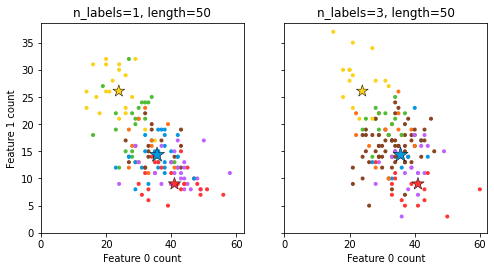

In [9]:
def plot_2d(ax, n_labels=1, n_classes=3, length=50):
    X, Y, p_c, p_w_c = make_ml_clf(
        n_samples=150,
        n_features=2,
        n_classes=n_classes,
        n_labels=n_labels,
        length=length,
        allow_unlabeled=False,
        return_distributions=True,
        random_state=RANDOM_SEED,
    )

    ax.scatter(
        X[:, 0], X[:, 1], color=COLORS.take((Y * [1, 2, 4]).sum(axis=1)), marker="."
    )
    ax.scatter(
        p_w_c[0] * length,
        p_w_c[1] * length,
        marker="*",
        linewidth=0.5,
        edgecolor="black",
        s=20 + 1500 * p_c ** 2,
        color=COLORS.take([1, 2, 4]),
    )
    ax.set_xlabel("Feature 0 count")
    return p_c, p_w_c


_, (ax1, ax2) = plt.subplots(1, 2, sharex="row", sharey="row", figsize=(8, 4))
plt.subplots_adjust(bottom=0.15)

p_c, p_w_c = plot_2d(ax1, n_labels=1)
ax1.set_title("n_labels=1, length=50")
ax1.set_ylabel("Feature 1 count")

plot_2d(ax2, n_labels=3)
ax2.set_title("n_labels=3, length=50")
ax2.set_xlim(left=0, auto=True)
ax2.set_ylim(bottom=0, auto=True)

plt.show()

In [10]:
print("The data was generated from (random_state=%d):" % RANDOM_SEED)
print("Class", "P(C)", "P(w0|C)", "P(w1|C)", sep="\t")
for k, p, p_w in zip(["red", "blue", "yellow"], p_c, p_w_c.T):
    print("%s\t%0.2f\t%0.2f\t%0.2f" % (k, p, p_w[0], p_w[1]))

The data was generated from (random_state=186):
Class	P(C)	P(w0|C)	P(w1|C)
red	0.31	0.82	0.18
blue	0.39	0.71	0.29
yellow	0.30	0.48	0.52
